In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import matplotlib_inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC,SVMSMOTE
import joblib

In [7]:
df=pd.read_csv("Hr.Analytics",sep="\t")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Checking the first 5 and last 5 rows of our dataset. We can see that our dataset comprises of total 1470 rows and 35 columns. The column "Attrition" is our label that needs to be predicted in assisting the HR professionals to understand what causes attrition in an organization and help them with retention process. Apart from the "Attrition" column right now all the remaining columns are our features that we will be using to generate our prediction. Since our label column is based upon binary classes this becomes a Classification problem!

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<span class="girk">Exploratory Data Analysis (EDA)</span>

In [11]:
df.shape

(1470, 35)

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that currently there are 26 columns that have integer datatype and 9 columns that have object datatype. We will need to treat the object datatype columns so that our machine learning model can understand the data since the acceptance of numerical data is mandatory.

In [14]:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


We are checking the total number of unique values present in each column be it categorical or numerical data.

In [15]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

we do not have any missing values in any of our columns so we won't have to worry about handling missing data.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


With the help of decribe method,  we are able to take a look at our column clearly. The count column once again confirms that there are no missing data concern in our dataset. However if we check the min column we do notice columns with zero as their values. However considering the columns that have 0 value in them it is quite possible for freshers in an organisation to have them as 0 marked in their records.

Here we only get numerical data information therefore all the object datatype columns have been ignored.

In [17]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

I am dropping all the unwanted columns after careful observations done above.

*EmployeeCount - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee
*EmployeeNumber - Since it is just a unique number provided to each employee that has nothing to do with attrition

*Over18 - As per child labour law any person below the age of 18 is not eligible for employement in India and also this particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees

*StandardHours - Again in this column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition as there is no partiality in these terms on any employee

In [18]:
object_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_data.append(x)
object_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [19]:
integer_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_data.append(x)
integer_data

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Here we have a list of all the 9 columns hold objectdata and 23 columns that hold integer data that will comprise the categorical and numerical data part of our ML project.

<span class="girk">Visualization</span>

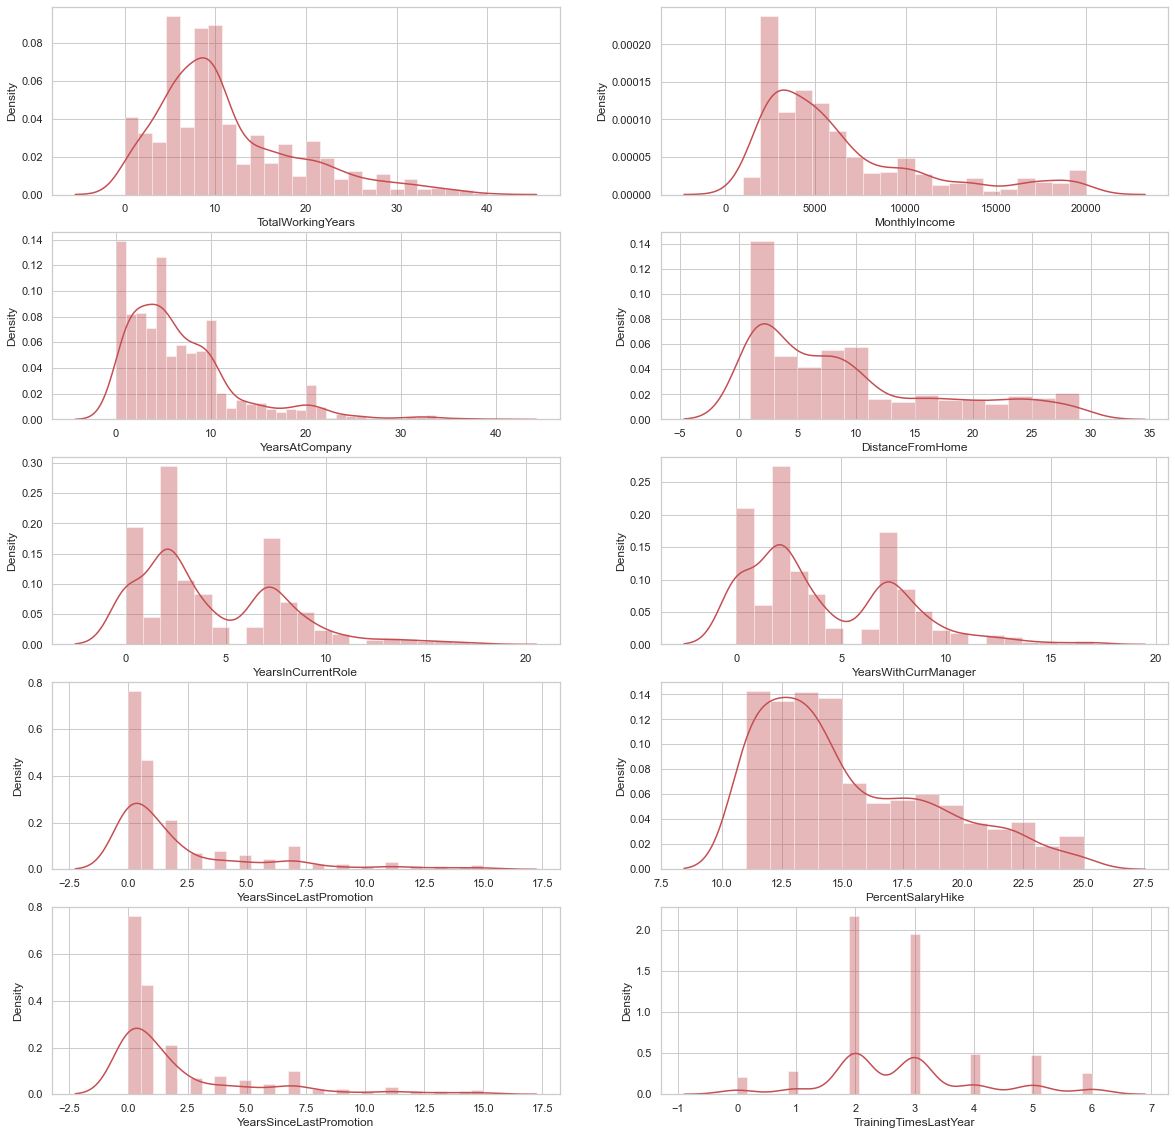

In [20]:
# Univariate Analysis

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(5,2, figsize=(20,20))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0],color='r') 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1],color='r') 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0],color='r') 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1],color='r') 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0],color='r') 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1],color='r') 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0],color='r') 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1],color='r') 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0],color='r') 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1],color='r') 

plt.show()

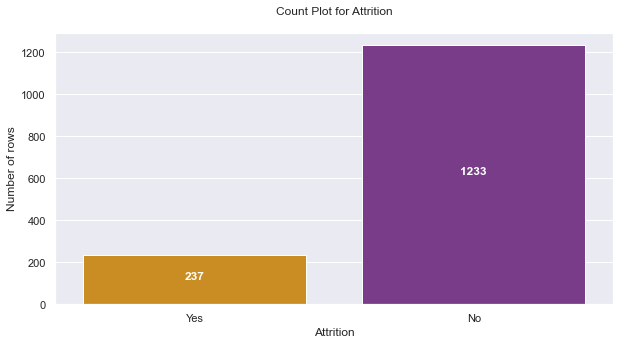

In [21]:
plt.figure(figsize=(10,5))
sns.set_theme()
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="CMRmap_r")

for i in ax.get_xticklabels():
    sns.set_theme()
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=0)
plt.show()

So looking at the above countplot we can see that our target label is quite imbalanced and will needed to be treated for the same.

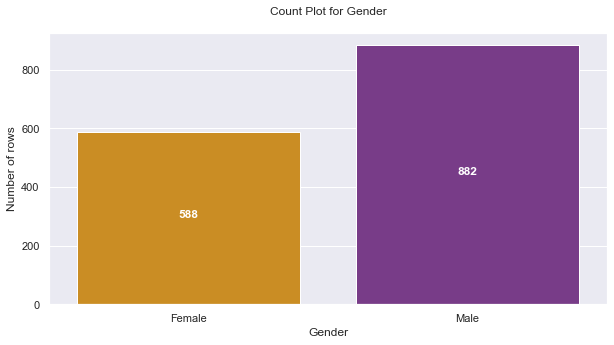

In [22]:
plt.figure(figsize=(10,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0

ax = sns.countplot(df[col_name], palette="CMRmap_r")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=0)
plt.show()

In the Gender column we can see that the number of male employees is higher than the female employees. This is one of the situation in mostly all the organizational workforce across India.

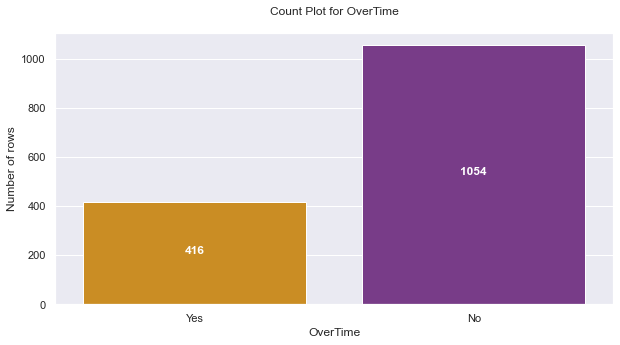

In [23]:
plt.figure(figsize=(10,5))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="CMRmap_r")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

The OverTime column shows us the number of employees who do over time and the one's who do not. And it looks like from the above count plot that employees do not prefer doing over time in the company.

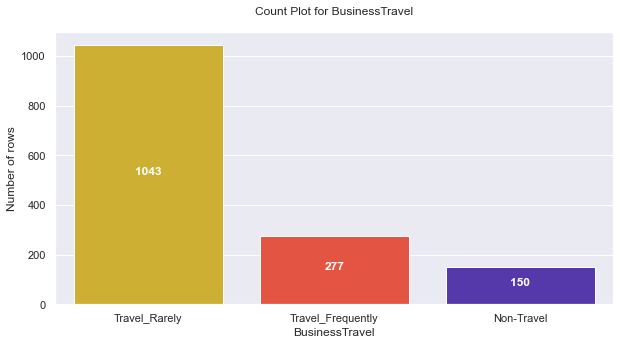

In [24]:
plt.figure(figsize=(10,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="CMRmap_r")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=0)
plt.show()

In the BusinessTravel column we see a majority of number in the Travel_Rarely value while Non_Travel are the least of them.

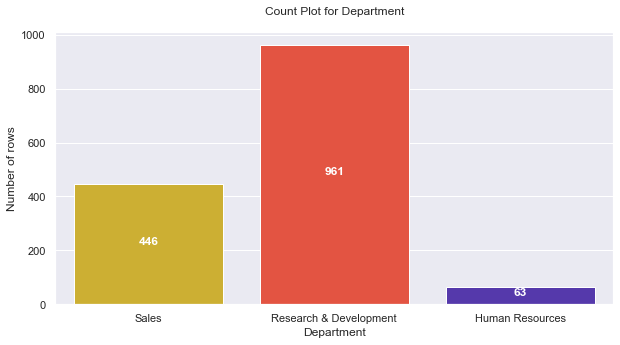

In [25]:
plt.figure(figsize=(10,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="CMRmap_r")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=0)
plt.show()

In the Department column we see lots of values for R&D department however the least number of employees are in HR since an organisation would need a limited number of Human Resources team it makes sense for it to have the least value.

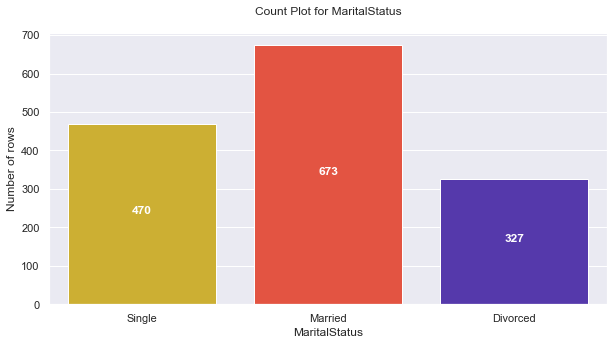

In [26]:
plt.figure(figsize=(10,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="CMRmap_r")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=0)
plt.show()

In the MaritalStatus column plot we can see that the number of married employees is highest and the number of divorced employees is lowest.

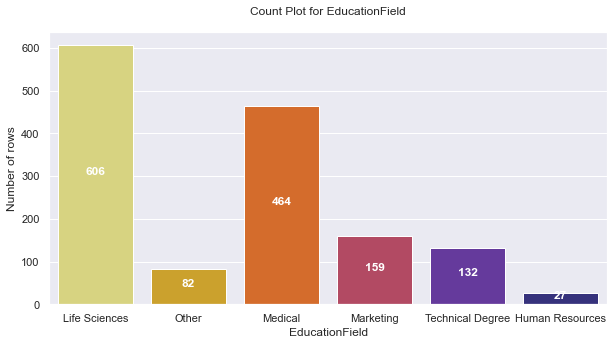

In [27]:
plt.figure(figsize=(10,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="CMRmap_r")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=0)
plt.show()

For the EducationField column we have employees majorly from the Life Sciences educational background and the least from HR since that department needs lesser number of employees to contribute in the organization.

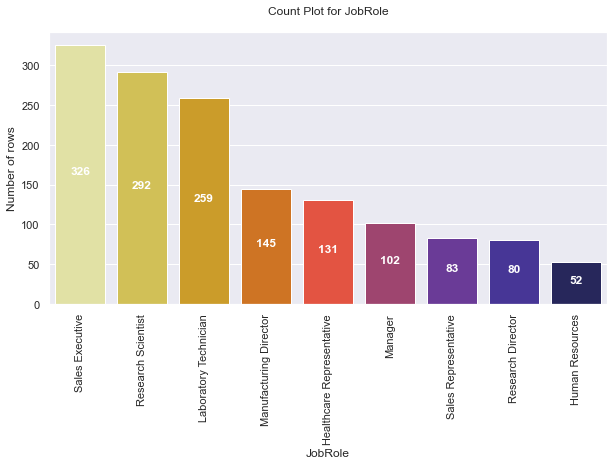

In [28]:
plt.figure(figsize=(10,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="CMRmap_r")


for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

Pertaining to the JobRole column we can see that the highest number is found in sales executive designation since they are the grass root level employees who are the most productive and handle the business value directly. And as notice in other plots we have the lowest number for HR roles as the employees present in that department are the lowest as well.

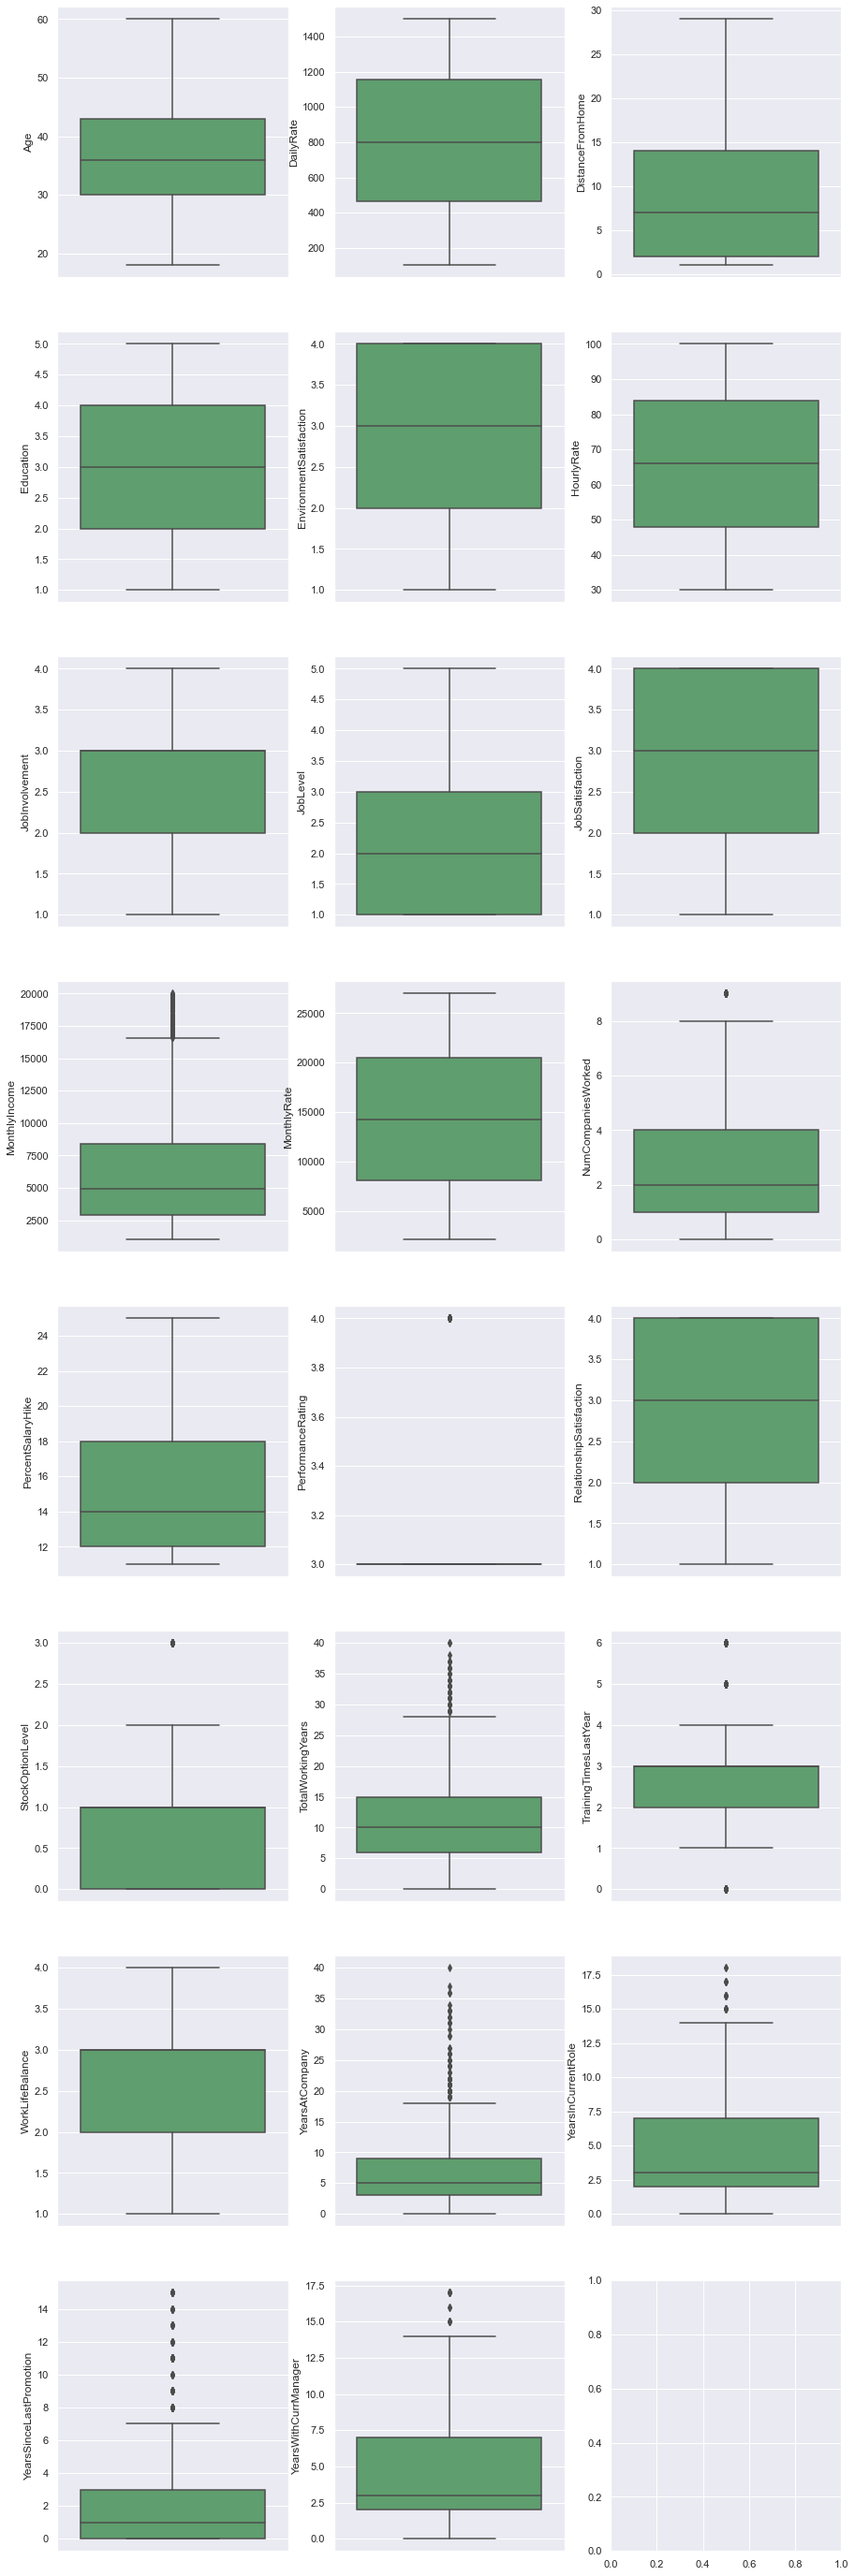

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_data].items():
    sns.boxplot(y=col, data=df, ax=ax[index],color='g')
    index += 1
plt.show()

We have created a box plot visual for all our integer datatype columns to check for outliers. We do see some of the columns where there are presence of outliers and we will need to treat it accordingly.

MonthlyIncome

NumCompaniesWorked

PerformanceRating

StockOptionLevel

TotalWorkingYears

TrainingTimesLastYear

YearsAtCompany

YearsInCurrentRole

YearsSinceLastPromotion

YearsWithCurrManager

All the above columns show visible outlier details.

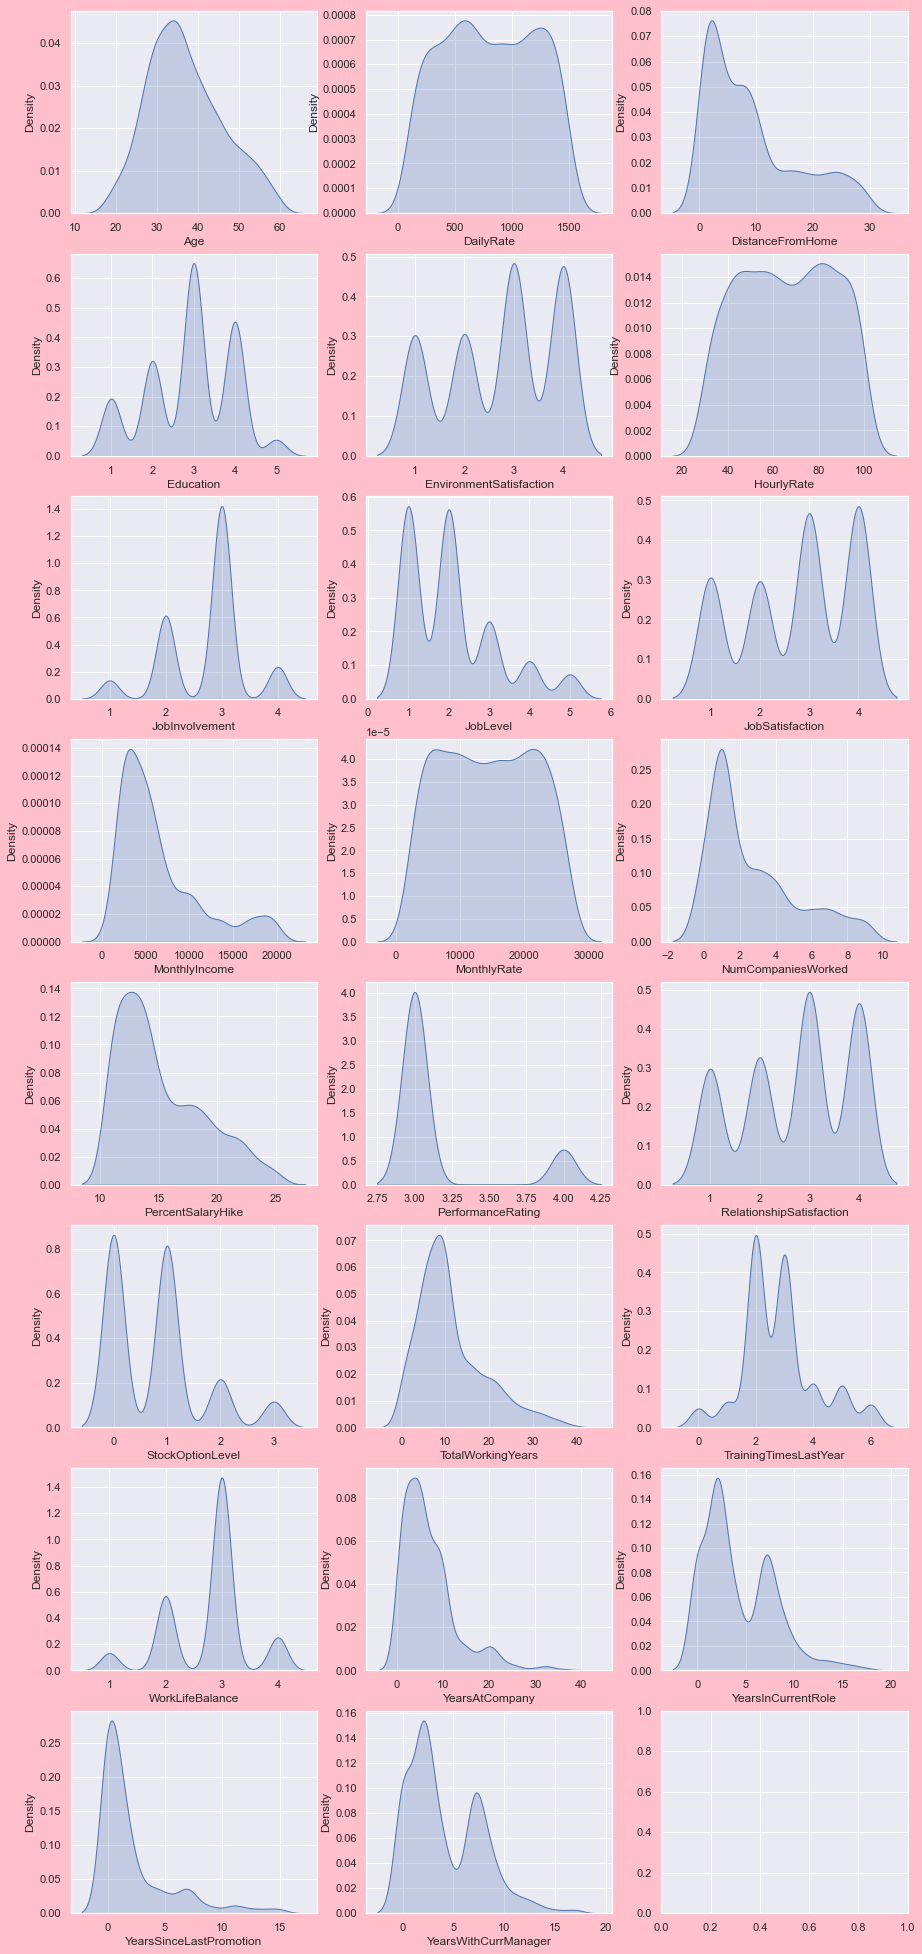

In [30]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,35),facecolor='pink')
index = 0
ax = ax.flatten()
for col, value in df[integer_data].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.show()

With the help of above distribution plot we are able to see some skewness present in few columns that will need to be handled as well.

DistanceFromHome

MonthlyIncome

NumCompaniesWorked

PercentSalaryHike

TotalWorkingYears

TrainingTimesLastYear

YearsAtCompany

YearsInCurrentRole

YearsSinceLastPromotion

YearsWithCurrManager

Above columns are showing some visible skewness mostly right skewed data presence.

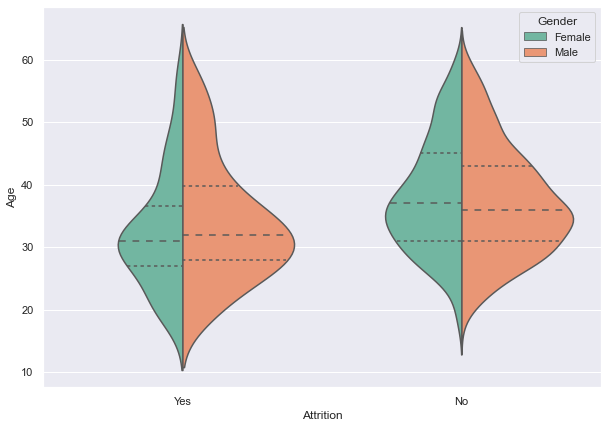

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above violin plot we see that the Attrition counts both in male and female are high when the are in their mid 20's and 30's of age.

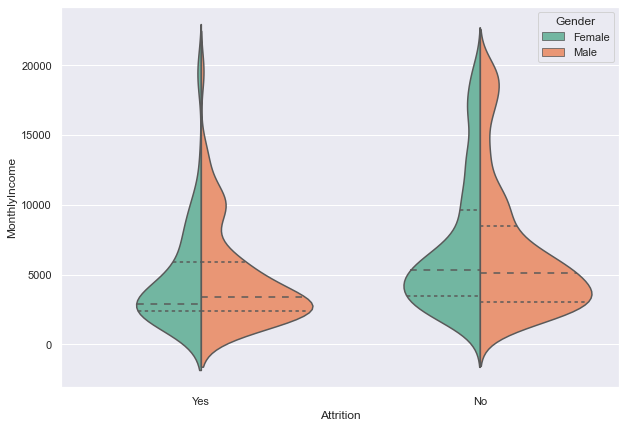

In [32]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
                split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above plot we can see that the Attrition peaks for both male and female employees when the monthly income is less than 5000.

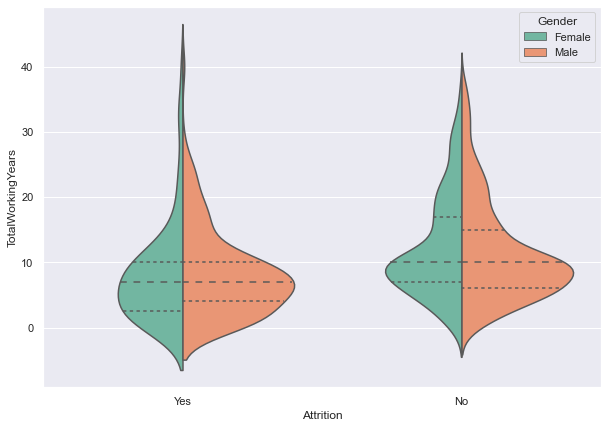

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
                split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above violin plot we notice that the Attrition for both male ad female employees occur when they are in their experience range of 1-10 years.

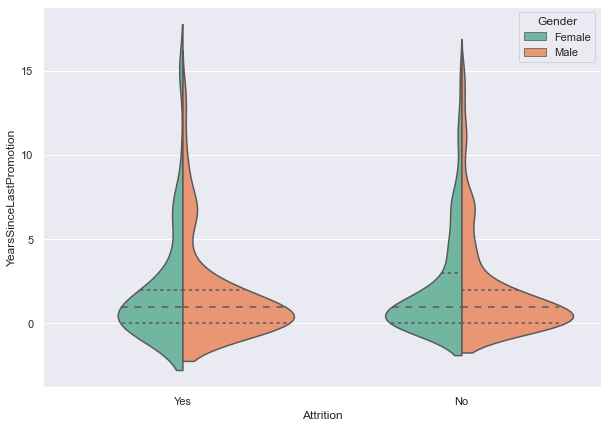

In [34]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
                split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above violin plot we notice that the Attrition for both male and female employees occur when they are in their experience range of 1-10 years.

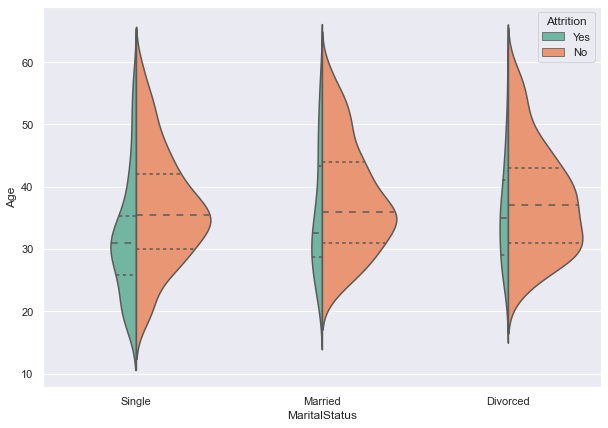

In [35]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
              split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above violin plot we can see that the Attrition rate is quite less in employees when they are married or divorced as compared to when they are single and have lesser responsibilities to deal with at their age.

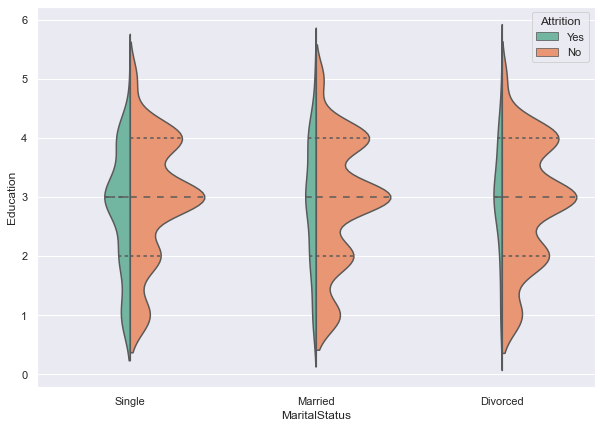

In [36]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
                split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above plot we notice that once again employees who are married or divorced and with good education choose stability in life rather than the one's who are single and are okay to take risks and oppotunities in life.

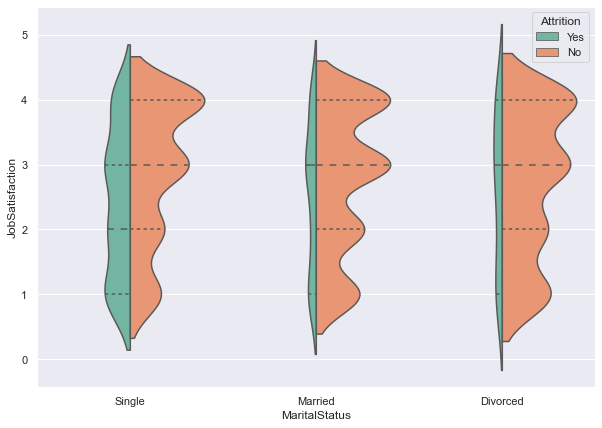

In [37]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, 
               split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above voilin part we can see that the job satisfaction part for singles is not that great compared to employees who are married or divorced may be due to the year of experience difference that makes a huge gap in pay scale. But we do otice stability and lesser attrition rate amongst employees who are married or divorced.

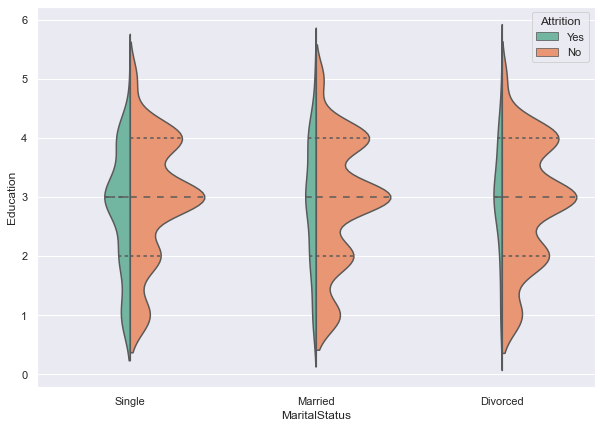

In [38]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
                split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above plot we notice that once again employees who are married or divorced and with good education choose stability in life rather than the one's who are single and are okay to take risks and oppotunities in life.

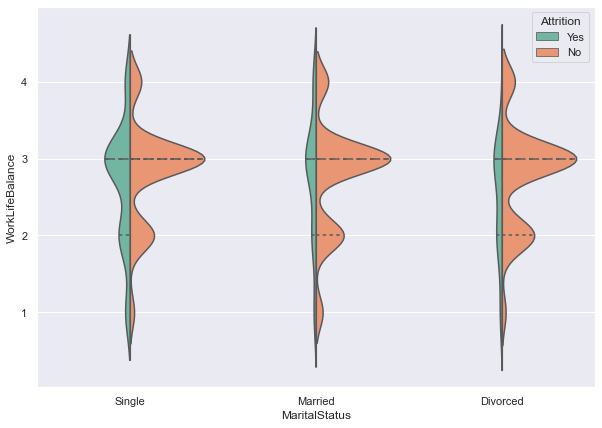

In [39]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, 
               split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above plot we can see that Work Life balance maintained by singles are quite less therefore there are attritions observed as they have to achieved lots of skills to get better in their career.

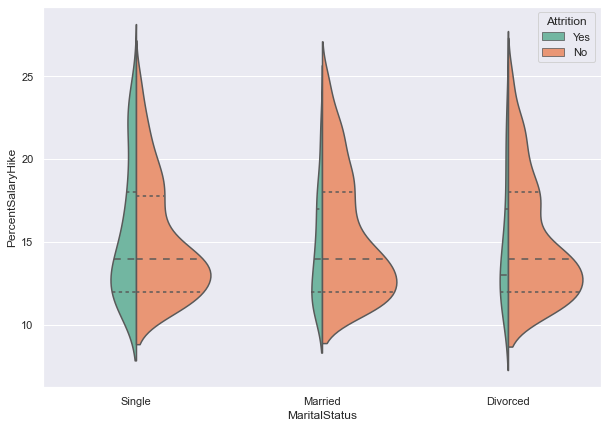

In [40]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
               split=True, scale="count", inner="quartile",palette="Set2")
plt.show()

In the above violin plot we can see that the Percent Salary Hike plays a major role when it come to Attrition amongst the Singles as comapred to their married or divorced counterparts.

Encoding the categorical object datatype columns

In [41]:
# Label Encoder

le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

I am using Label Encoder on our target column since we want our labels to be converted from the object datatype to numerical datatype.

In [42]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


We can see that our target label has been successfully updated into numerical format containing binary values of 0 and 1 where 1 shows Attrition Yes and 0 shows Attrition No.

In [43]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))

I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to integer datatype.

In [44]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


In the above dataframe we can clearly see that all our object datatype columns are now converted to numerical datatype which can be used in our machine learning models.

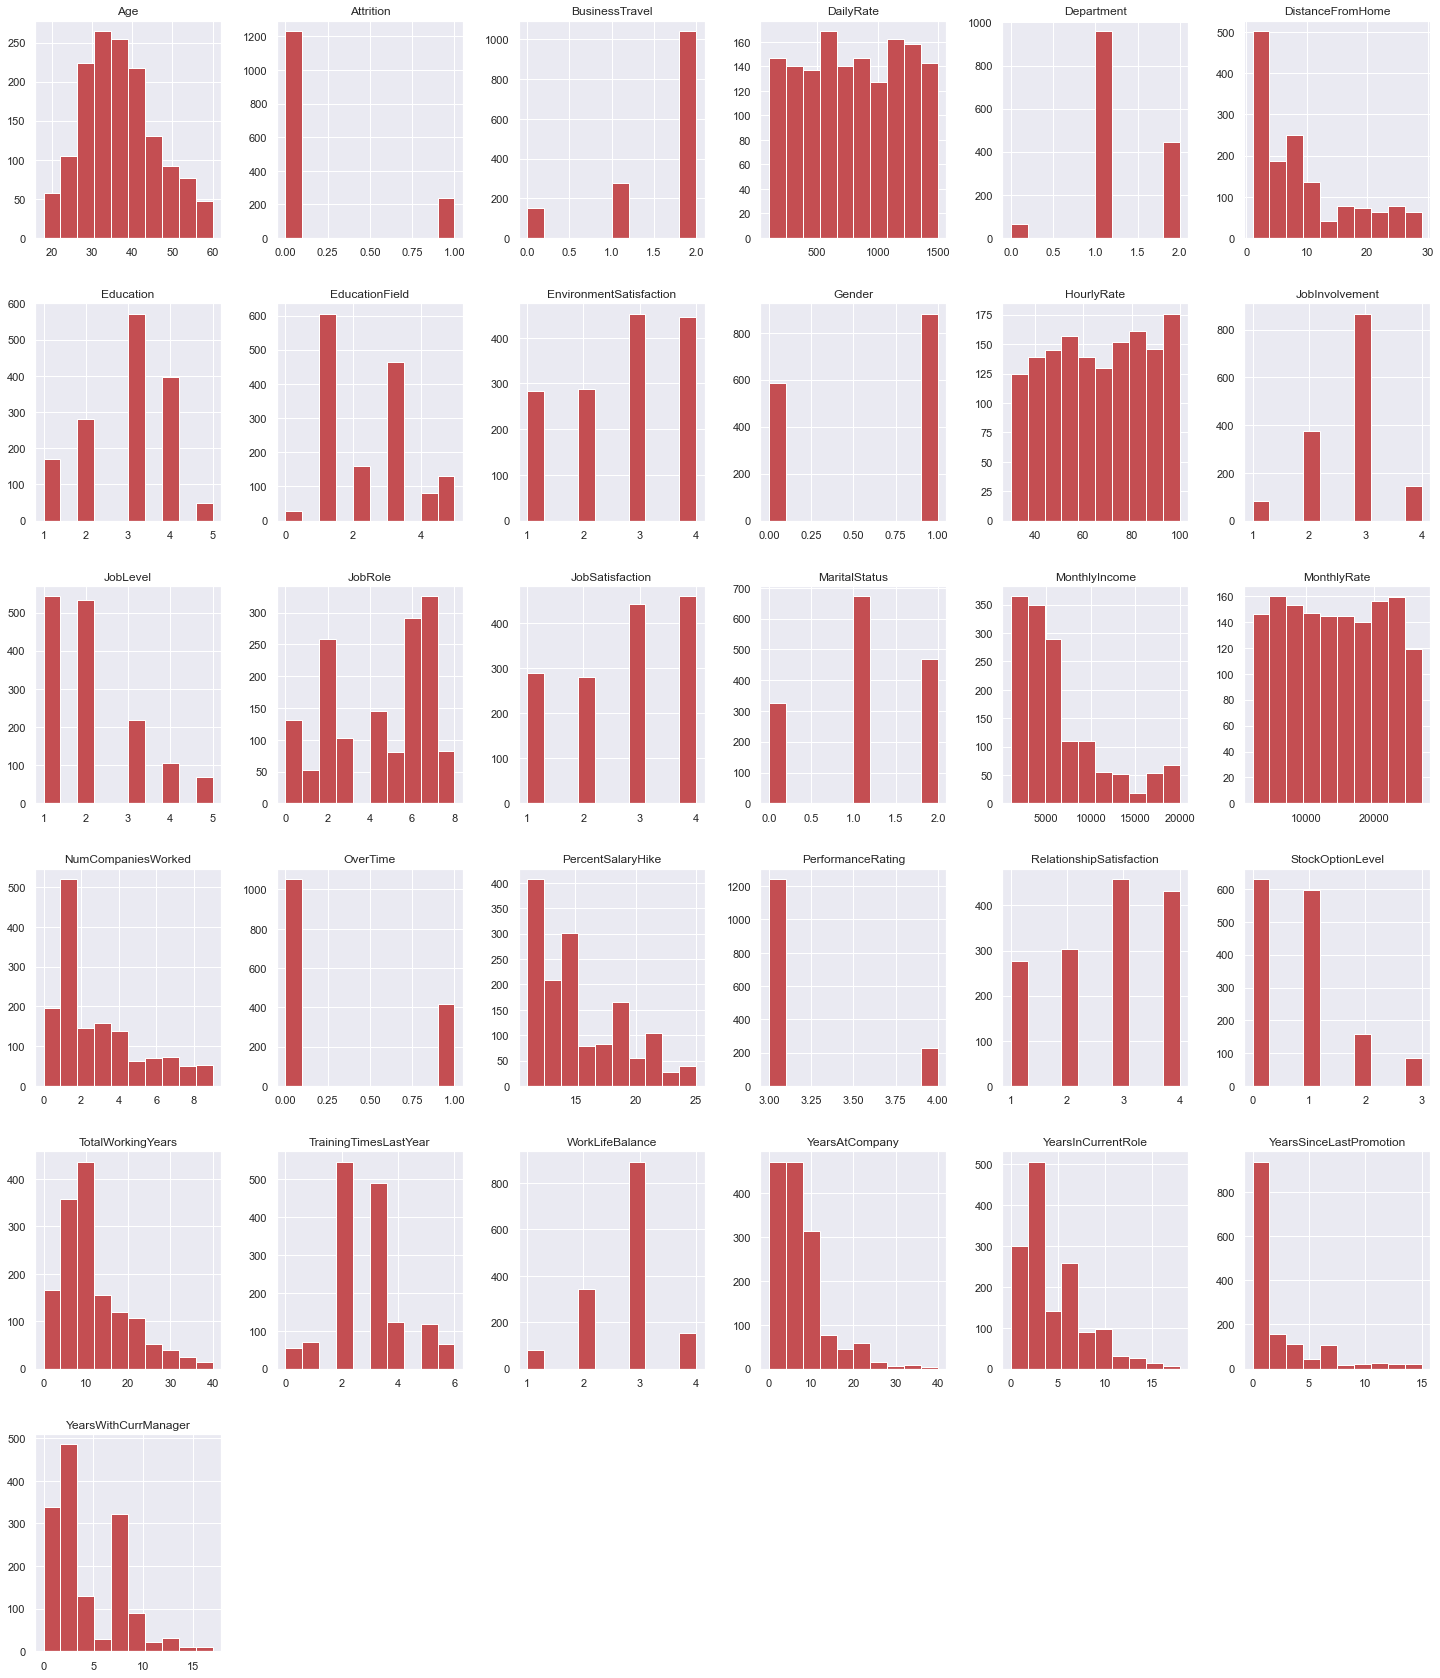

In [45]:

df.hist(figsize=(25,30),color='r')
plt.show()

Using the above histogram we are able to plot all the columns of are dataset post application of encoding technique where we do not have any object datatype columns anymore

Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

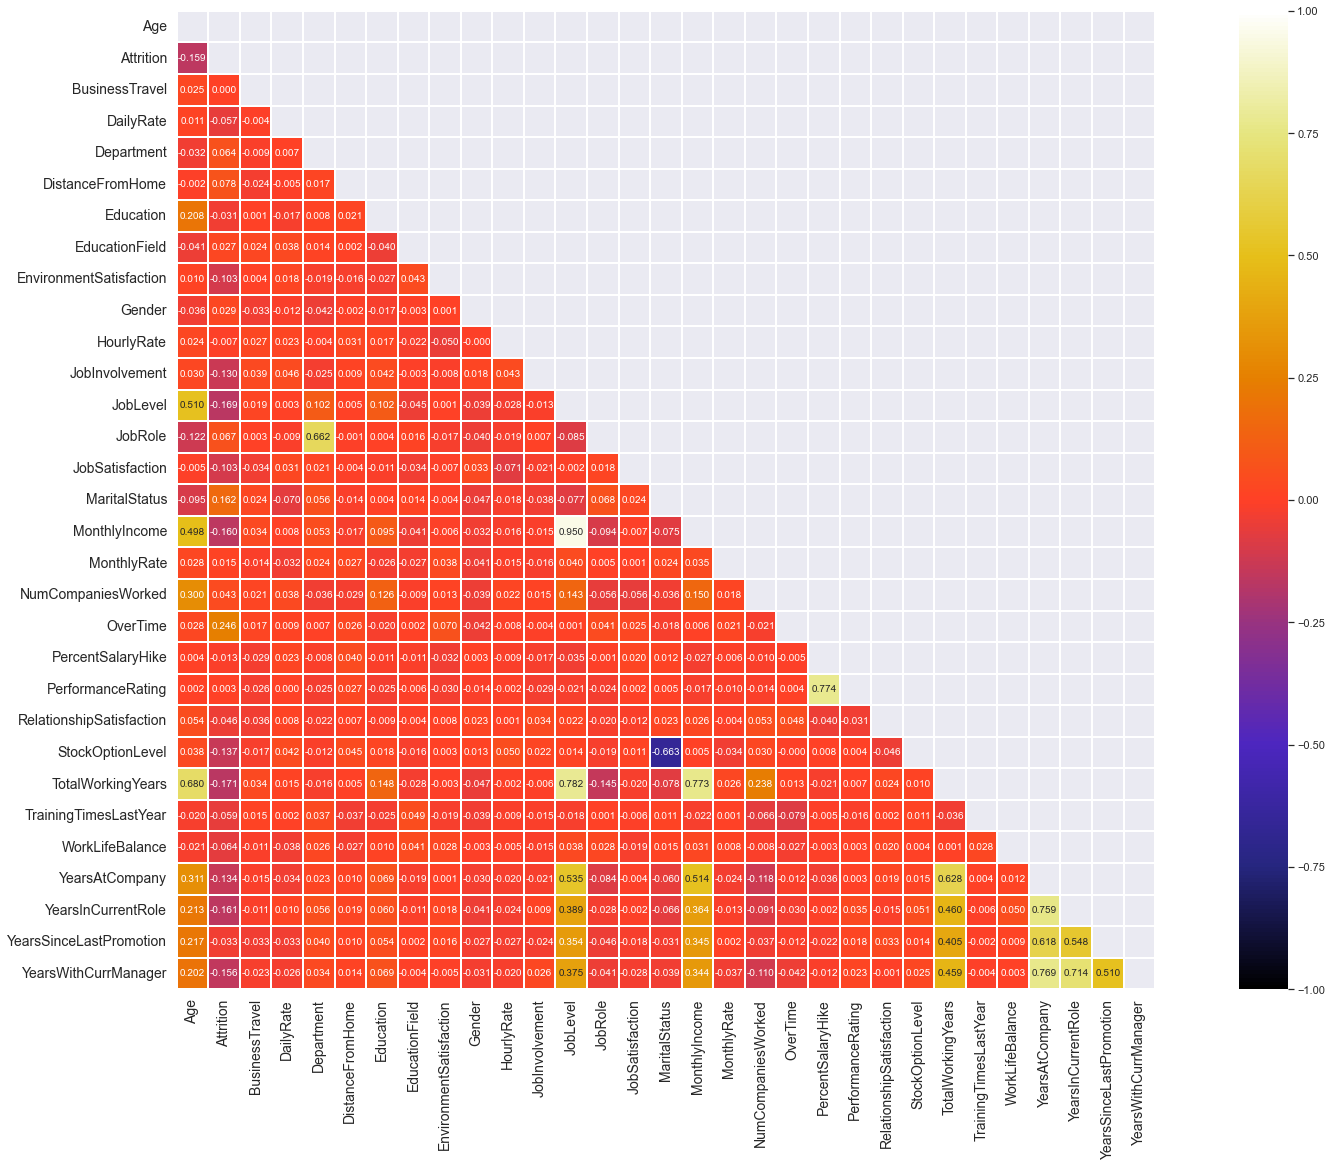

In [46]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), linewidths=.1,vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="CMRmap", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above heatmap we can see that our target label "Attrition" has both positive and negative correlations with the feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

Correlation Bar Plot comparing features with our label

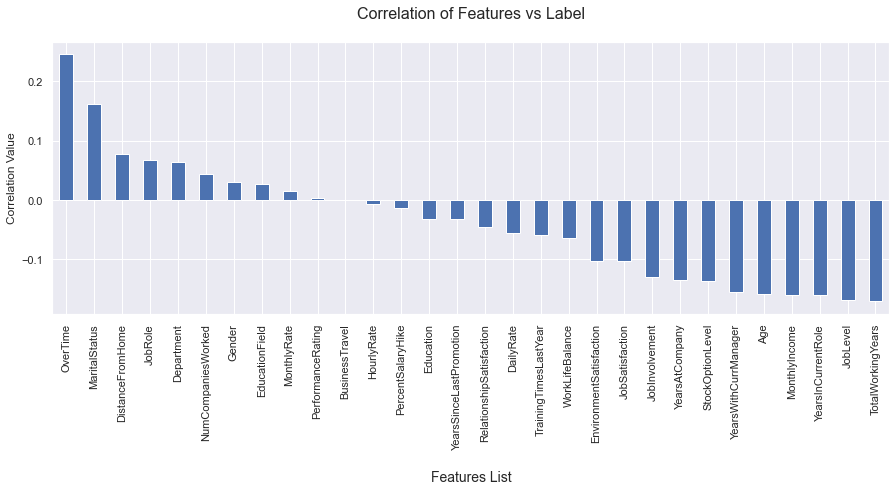

In [47]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

<span class="girk">Using Z Score to remove outliers</span>

In [48]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


I have used the Z score method to remove the outliers

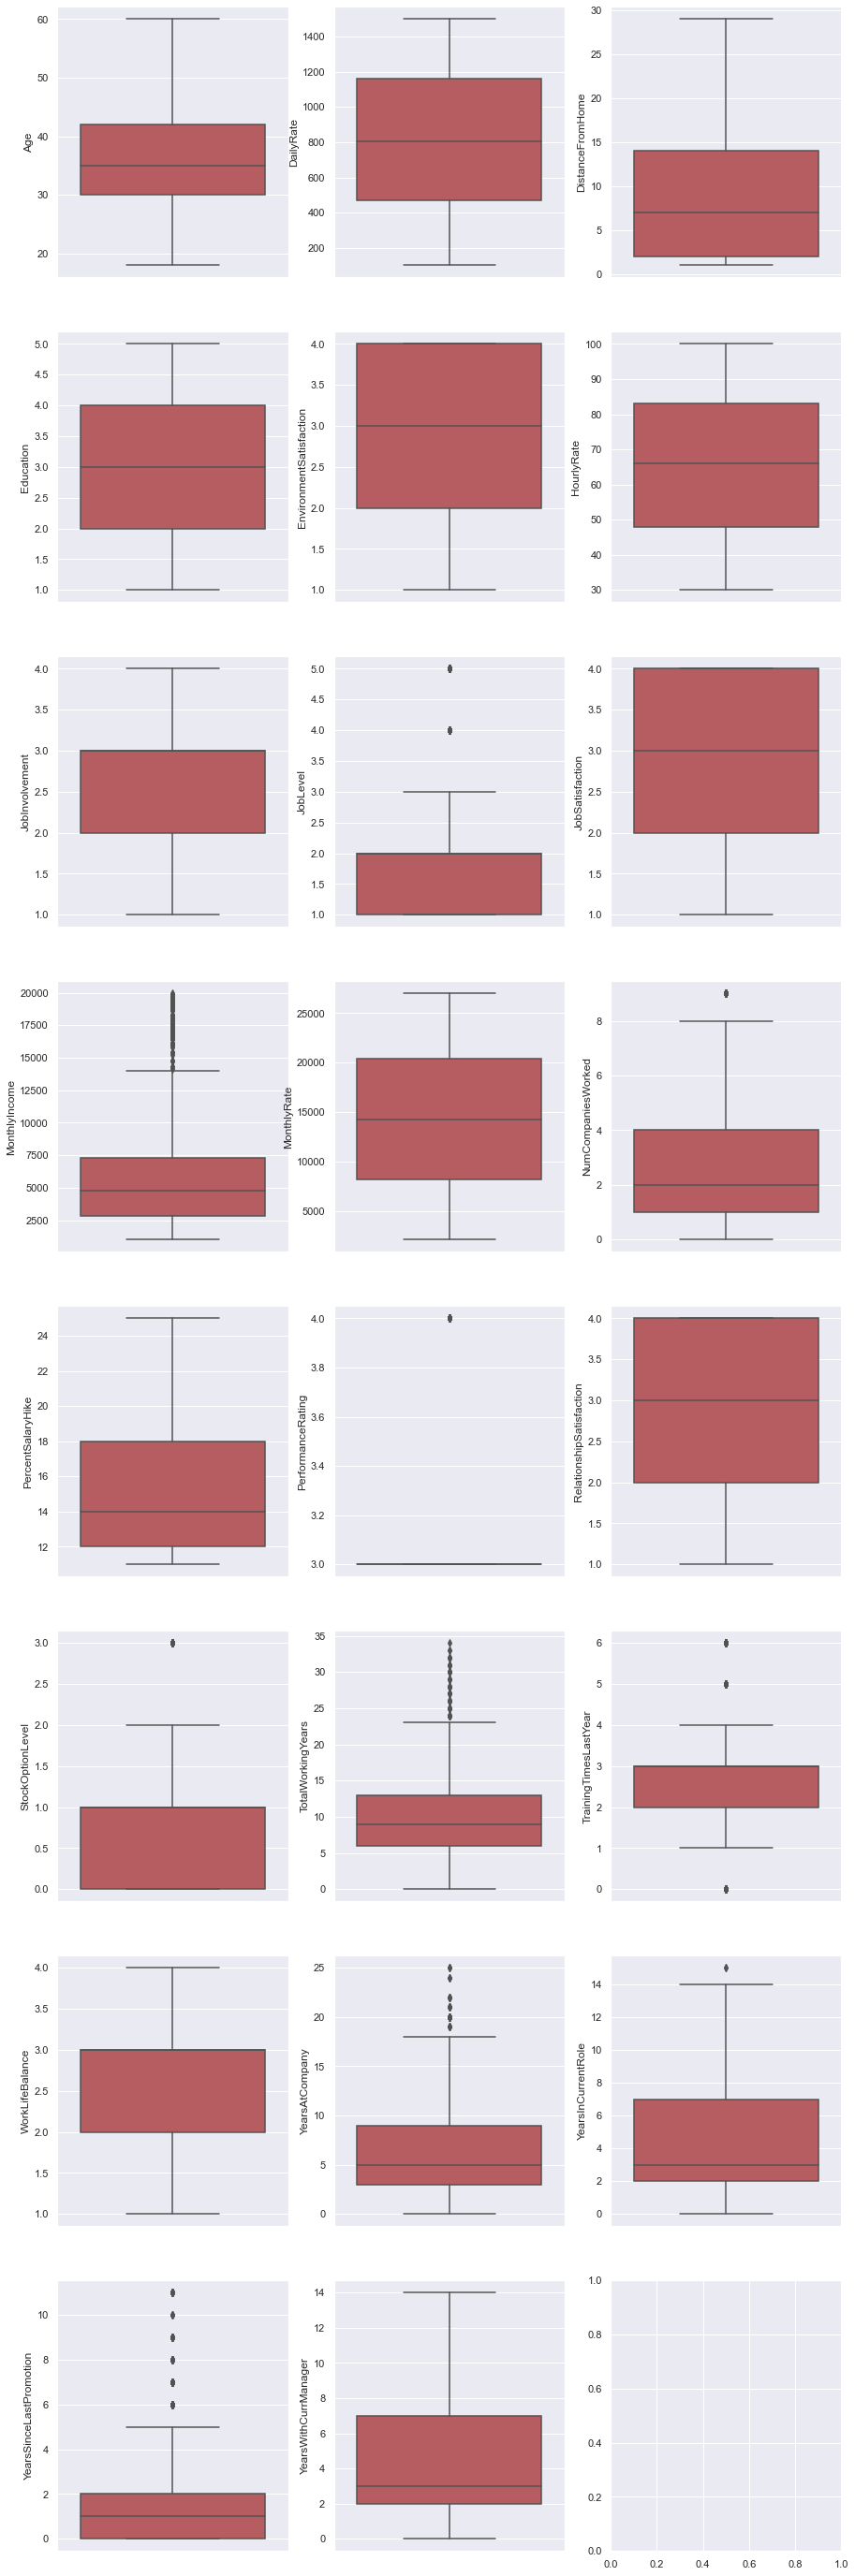

In [49]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_data].items():
    sns.boxplot(y=col, data=df, ax=ax[index],color='r')
    index += 1
plt.show()

In the above box plot we can see that whatever outliers we could have afforded to lose from our numerical columns we have gotten rid of it. There are still presence of outliers but since they are in continous format we shall ignore it.

In [50]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

Using Log Transform to fix skewness

In [51]:
for col in integer_data:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our dataset.

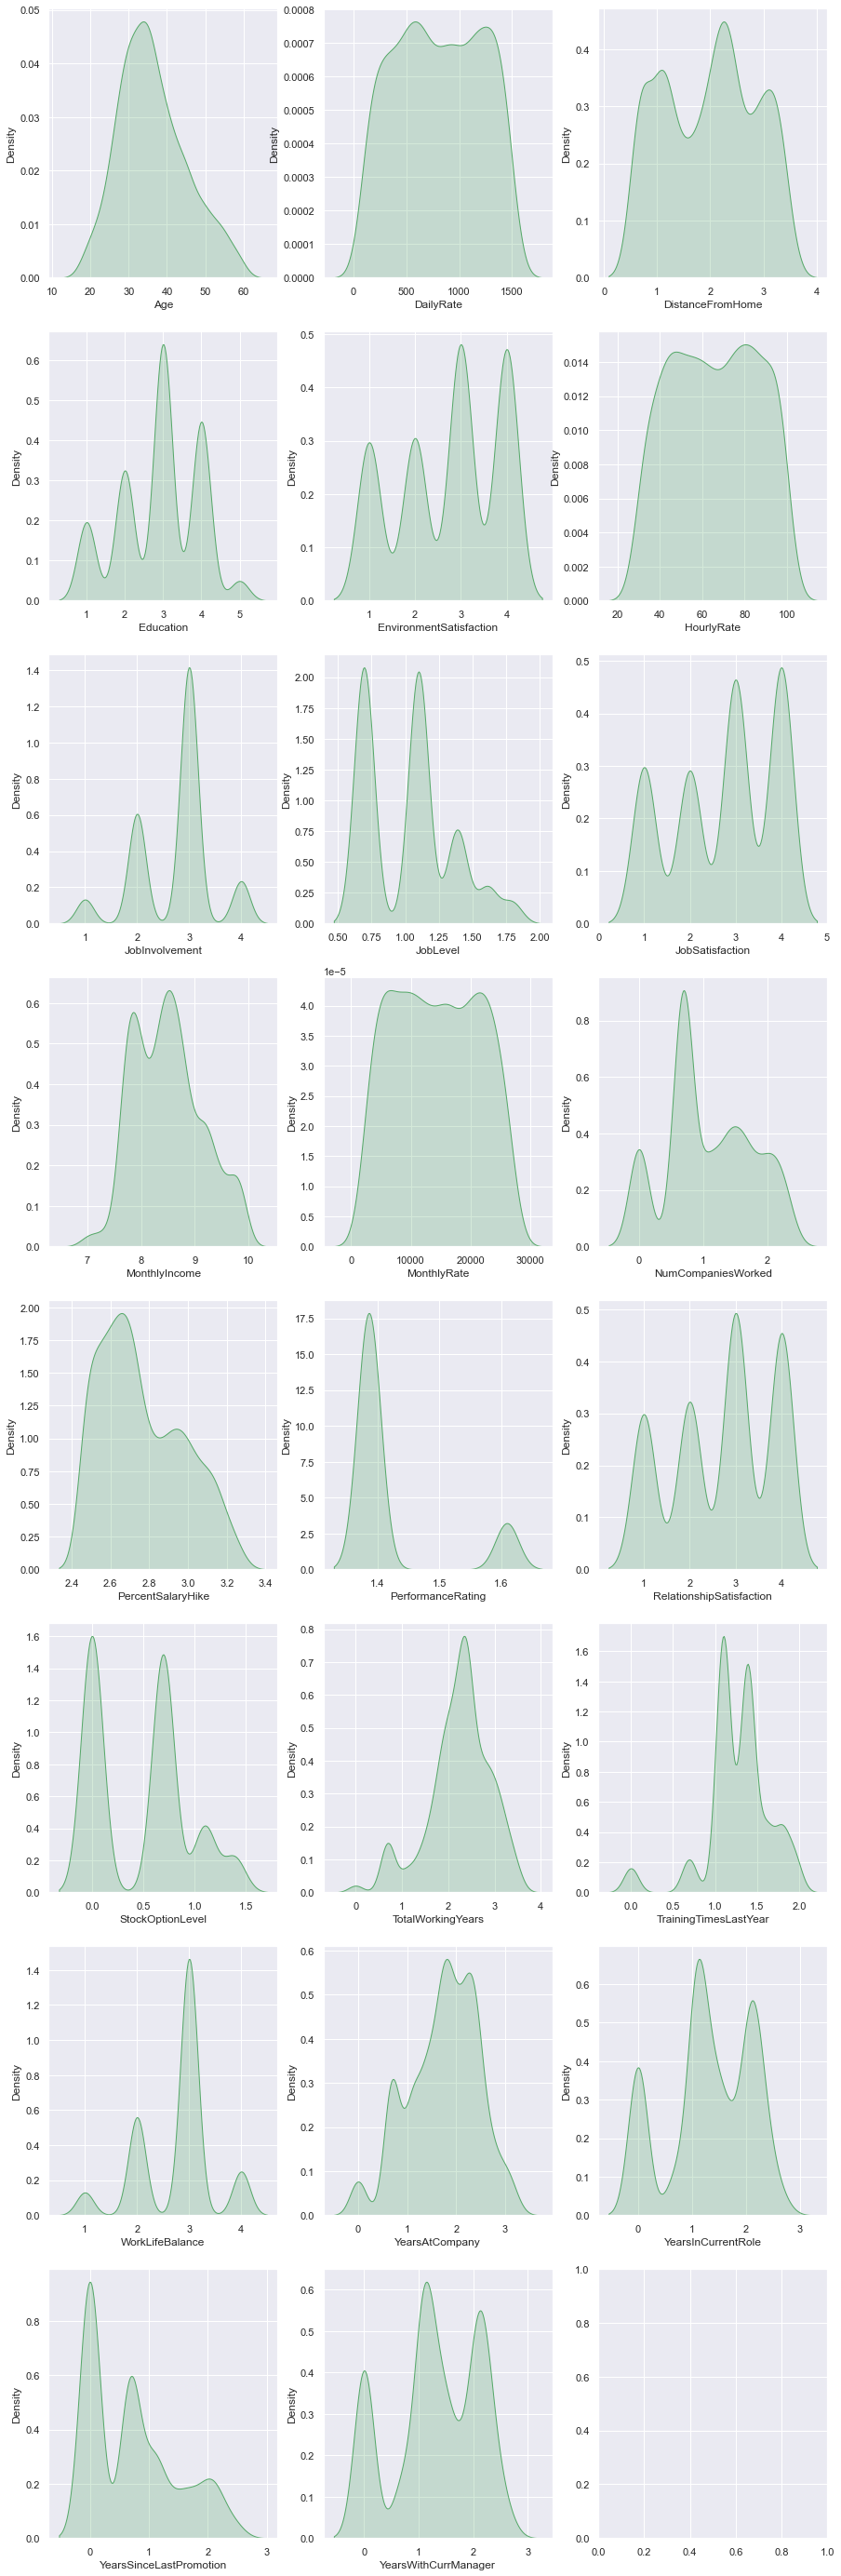

In [52]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_data].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.show()

We have managed to reduce the skewness from our numerical columns and that can be seen in the above distribution plot as well.

<span class="girk">Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label</span>

In [53]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

Resolving the class imbalance issue in label column

In [54]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [55]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [56]:
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

<span class="girk">Feature Scaling</span>

In [57]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.736455,0.668090,0.833532,1.397538,-1.683229,-0.745575,-1.026490,-0.434494,-1.359785,1.509140,0.640255,0.421944,0.998590,1.401434,1.143263,0.533189,0.674421,1.750978,1.366743,-1.376713,-0.476738,-1.429552,-0.944331,0.168918,-3.398725,-2.213304,0.504601,0.566651,-0.975201,0.834479
1,1.666777,-0.999589,-1.288871,-0.584187,0.206763,-1.772792,-1.026490,0.494673,0.850655,-0.250280,-0.734009,0.421944,0.571803,-0.473621,-0.312212,0.270504,1.431863,-0.650105,-0.863613,2.065143,2.471836,1.412373,0.671150,0.461269,0.377011,0.524950,1.156531,1.196257,0.025356,1.212138
2,0.271294,0.668090,1.532404,-0.584187,-1.173730,-0.745575,1.349221,1.423840,0.850655,1.402508,-0.734009,-0.968761,-1.135348,0.463906,1.143263,-1.246304,-1.709402,1.349784,1.366743,0.051786,-0.476738,-0.482244,-0.944331,-0.002676,0.377011,0.524950,-2.302121,-1.589315,-0.975201,-1.517679
3,-0.193867,-0.999589,1.581402,-0.584187,-0.812235,1.308859,-1.026490,1.423840,-1.359785,-0.516859,0.640255,-0.968761,0.571803,0.463906,-0.312212,-0.687827,1.187941,-0.650105,1.366743,-1.376713,-0.476738,0.465065,-0.944331,0.168918,0.377011,0.524950,0.867089,1.196257,1.025914,-1.517679
4,-0.891609,0.668090,-0.484266,-0.584187,-1.173730,-1.772792,0.557317,-1.363660,0.850655,-1.369911,0.640255,-0.968761,-1.135348,-0.473621,-0.312212,-0.390918,0.277140,1.919174,-0.863613,-0.979257,-0.476738,1.412373,0.671150,-0.197214,0.377011,0.524950,-0.717516,-0.117639,0.610645,-0.075460


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

Finding best random state for building Regression Models

In [58]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 89.00862068965517 on Random State 680


Great so with the help of random state selection process we have found our lucky number to be 895 amongst 1-1000

Creating the training and testing data sets

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=680)

I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models using the random state as 819

<span class="girk">Machine Learning Model for Classification with Evaluation Metrics</span>

In [63]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=680)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [64]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 89.00862068965517

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       230
           1       0.91      0.87      0.89       234

    accuracy                           0.89       464
   macro avg       0.89      0.89      0.89       464
weighted avg       0.89      0.89      0.89       464

Cross Validation Score: 84.4590191405377

Accuracy Score - Cross Validation Score is 4.549601549117469


In [65]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.24137931034483

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       230
           1       0.93      0.91      0.92       234

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464

Cross Validation Score: 90.29222834587026

Accuracy Score - Cross Validation Score is 1.949150964474569


In [66]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 84.91379310344827

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       230
           1       0.84      0.87      0.85       234

    accuracy                           0.85       464
   macro avg       0.85      0.85      0.85       464
weighted avg       0.85      0.85      0.85       464

Cross Validation Score: 83.25528785283383

Accuracy Score - Cross Validation Score is 1.6585052506144393


In [67]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 93.10344827586206

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93       230
           1       0.99      0.88      0.93       234

    accuracy                           0.93       464
   macro avg       0.94      0.93      0.93       464
weighted avg       0.94      0.93      0.93       464

Cross Validation Score: 90.81542786921872

Accuracy Score - Cross Validation Score is 2.2880204066433407


In [68]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 79.74137931034483

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.63      0.76       230
           1       0.73      0.96      0.83       234

    accuracy                           0.80       464
   macro avg       0.83      0.80      0.79       464
weighted avg       0.83      0.80      0.79       464

Cross Validation Score: 78.24002010873613

Accuracy Score - Cross Validation Score is 1.5013592016086932


In [69]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.47413793103449

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       230
           1       0.98      0.93      0.95       234

    accuracy                           0.95       464
   macro avg       0.96      0.95      0.95       464
weighted avg       0.96      0.95      0.95       464

Cross Validation Score: 94.00433827362775

Accuracy Score - Cross Validation Score is 1.469799657406739


In [70]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 92.24137931034483

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       230
           1       0.98      0.87      0.92       234

    accuracy                           0.92       464
   macro avg       0.93      0.92      0.92       464
weighted avg       0.93      0.92      0.92       464

Cross Validation Score: 88.78844864824607

Accuracy Score - Cross Validation Score is 3.452930662098751


<span class="girk">Hyper parameter tuning on the best Classification ML Model</span>

In [71]:
# Choosing Decision Tree Classifier

fmod_param ={"max_features":['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [72]:
gcv=GridSearchCV(RandomForestClassifier(),fmod_param,cv=7,scoring='accuracy')
gcv.fit(X_train,Y_train)
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [73]:
gcv_pred=gcv.best_estimator_.predict(X_test)
accuracy_score(Y_test,gcv_pred)

0.9288793103448276

Here the Grid Search CV has provided me with the best score details

<span class="girk">AUC ROC Curve</span>

In [74]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [75]:
Model=[lg,dtc,rfc,svc,abc,gb]

Accuracy score for the Best Model is: 89.00862068965517


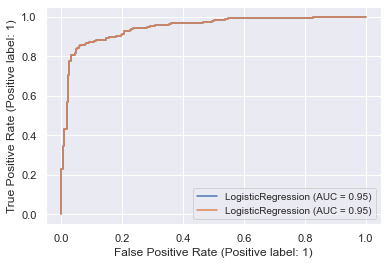

Accuracy score for the Best Model is: 84.26724137931035


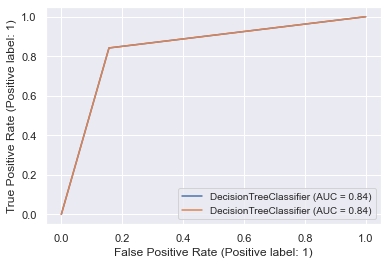

Accuracy score for the Best Model is: 93.31896551724138


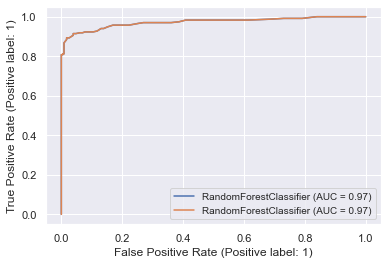

Accuracy score for the Best Model is: 92.24137931034483


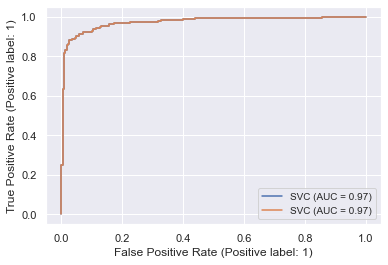

Accuracy score for the Best Model is: 91.59482758620689


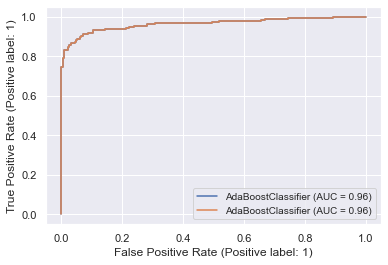

Accuracy score for the Best Model is: 92.02586206896551


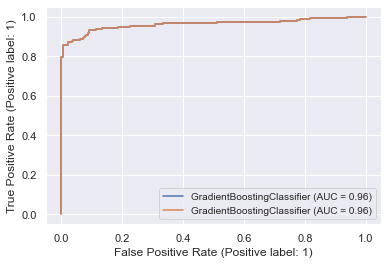

In [76]:
#Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
for i in Model:
    Classifier =i.fit(X_train, Y_train)
    fmod_pred = i.predict(X_test)
    fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
    print("Accuracy score for the Best Model is:", fmod_acc)
    disp = plot_roc_curve(i,X_test, Y_test)
    plot_roc_curve(i, X_test, Y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
    
    plt.legend(prop={'size':10}, loc='lower right')
    plt.show()

<span class="girk">Confusion Matrix</span>

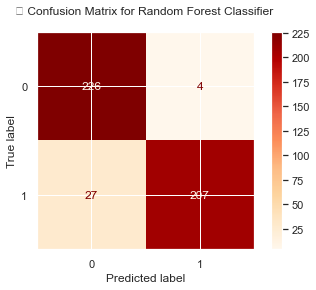

In [82]:
class_names = df.columns
metrics.plot_confusion_matrix(rfc, X_test, Y_test, cmap='OrRd')
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

<span class="girk">Saving model</span>

In [83]:
filename = "rfc_hr.pkl"
joblib.dump(rfc, filename)

['rfc_hr.pkl']

Finally I am saving my best classification model using the joblib library.